In [1]:
import requests as r
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np


response = r.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=aapl&outputsize=full&apikey=(4YF25HFLTRHUL65K)')

data = response.text
parsed = json.loads(data)
metadata = parsed['Meta Data']
tsdata = parsed['Time Series (Daily)']
tsdf = pd.DataFrame.from_dict(tsdata, orient='index')
tsdf_new=tsdf.loc[:'2009-01-02', :]
index = pd.DatetimeIndex(tsdf_new.index)
tsdf_new1 = pd.DataFrame(tsdf_new, index=index)
#tsdf_new1['7. dividend amount'] = pd.to_numeric(tsdf_new1['7. dividend amount'])
#tsdf_new1= tsdf_new1[tsdf_new1['7. dividend amount'] != 0]
tsdf_new1



,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2021-03-25,119.54,121.66,119.0,120.59,120.59,98844681,0.0000,1.0
2021-03-24,122.82,122.9,120.065,120.09,120.09,88530485,0.0000,1.0
2021-03-23,123.33,124.24,122.14,122.54,122.54,95467142,0.0000,1.0
2021-03-22,120.33,123.87,120.26,123.39,123.39,111912284,0.0000,1.0
2021-03-19,119.9,121.43,119.675,119.99,119.99,185549522,0.0000,1.0
...,...,...,...,...,...,...,...,...
2009-01-08,90.43,93.15,90.04,92.7,2.8513609598,24053600,0.0000,1.0
2009-01-07,91.81,92.5,90.26,91.01,2.79937821954,26894600,0.0000,1.0
2009-01-06,95.95,97.17,92.39,93.02,2.86120384553,46046800,0.0000,1.0
2009-01-05,93.17,96.18,92.71,94.58,2.90918791346,42200300,0.0000,1.0


<AxesSubplot:xlabel='date'>

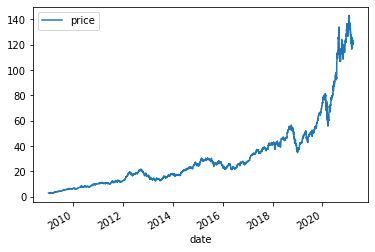

In [2]:
tsdf_new1['price'] = tsdf_new1['5. adjusted close']
tsdf_new1['date'] = tsdf_new1.index

tsdf_new1.price = pd.to_numeric(tsdf_new1.price)
tsdf_new1.date = pd.to_datetime(tsdf_new1.date)

tsdf_new1.plot(y='price', x='date')

In [4]:
data1 = pd.read_excel('FundamReport.xls', sheet_name = 'Sheet1', index_col=0)
debt = data1.loc['TOTAL LIABILITIES']
date = data1.loc['Period End Date']
debt




Unnamed: 1     287830
Unnamed: 2     258549
Unnamed: 3     245062
Unnamed: 4     241975
Unnamed: 5     251087
Unnamed: 6     248028
Unnamed: 7     225783
Unnamed: 8     236138
Unnamed: 9     255827
Unnamed: 10    258578
Unnamed: 11    234248
Unnamed: 12    240624
Unnamed: 13    266595
Unnamed: 14    241272
Unnamed: 15    212748
Unnamed: 16    200450
Unnamed: 17    198751
Unnamed: 18    193437
Unnamed: 19    179061
Unnamed: 20    174820
Unnamed: 21    165017
Unnamed: 22    170990
Unnamed: 23    147474
Unnamed: 24    132188
Unnamed: 25    138566
Unnamed: 26    120292
Unnamed: 27    101580
Unnamed: 28     85810
Unnamed: 29     95500
Unnamed: 30     83451
Unnamed: 31     76502
Unnamed: 32     59253
Unnamed: 33     68742
Unnamed: 34     57854
Unnamed: 35     51150
Unnamed: 36     48436
Unnamed: 37     48627
Unnamed: 38     39756
Unnamed: 39     37415
Unnamed: 40     33427
Unnamed: 41     32076
Unnamed: 42     27392
Unnamed: 43     21614
Unnamed: 44     17709
Unnamed: 45     18158
Unnamed: 4

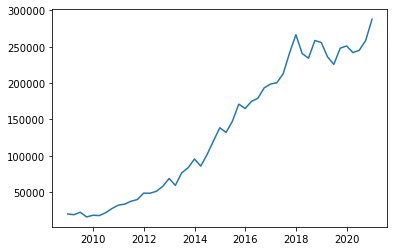

In [5]:
plt.plot(date, debt)

<AxesSubplot:xlabel='date'>

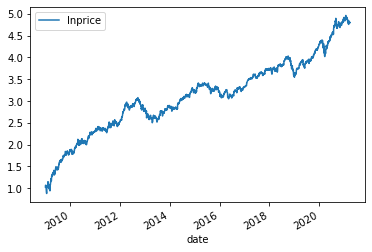

In [6]:
tsdf_new1['lnprice'] = np.log(tsdf_new1['price'])
tsdf_new1.plot(y='lnprice', x='date')